In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

from utils import AreaEnergy, TSF

공대7호관_HV_02 = AreaEnergy('공대7호관.HV_02',
                         path_time=r"C:\Users\Andrew\Documents\Project\Time Series\Kepco-Search/dataset/Electricity data_CNU/3.unit of time(일보)")

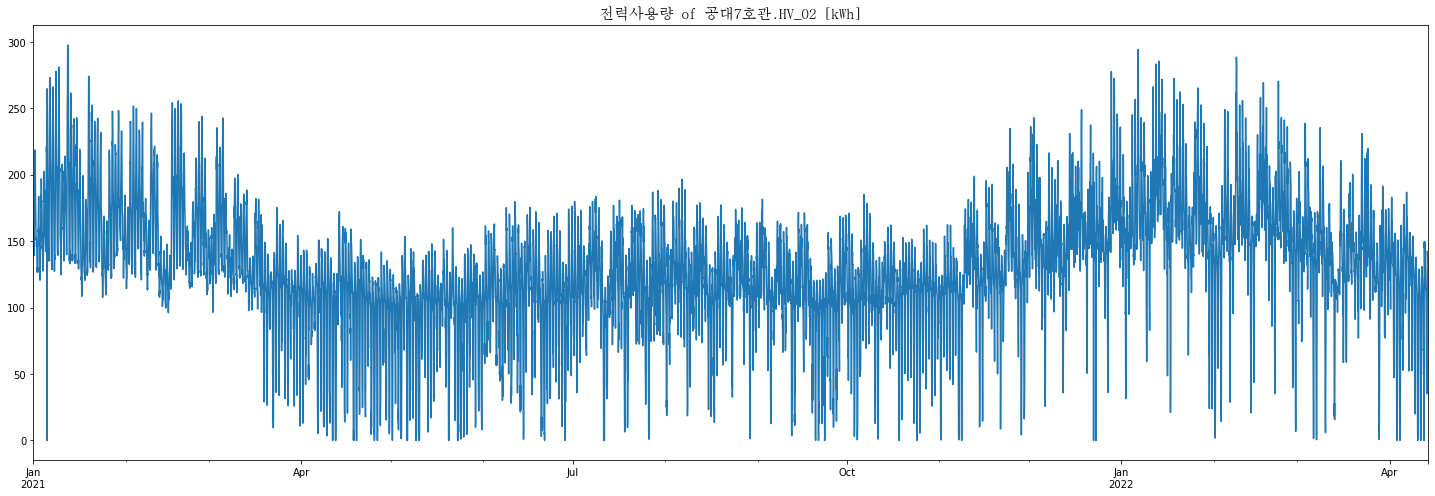

In [3]:
공대7호관_HV_02.plot_sequence()

In [4]:
input_width = 12
label_width = 1
num_features = 1

tsf = TSF(공대7호관_HV_02.arr_seq_dataset, batch_size=32, shift=1, shuffle=False, input_width=input_width,
          label_width=label_width)

Inputs shape (batch, time, features): (32, 12, 1)
Labels shape (batch, time, features): (32, 1, 1)


In [ ]:
import tensorflow as tf
from tcn import TCN
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input

input = Input(shape=(input_width, num_features))

x1 = TCN(input_shape=(input_width, 1),
         kernel_size=2,
         use_skip_connections=False,
         use_batch_norm=False,
         use_weight_norm=False,
         use_layer_norm=False
         )(input)

x2 = Dense(units=1, activation='linear')

model = Sequential([
    TCN(input_shape=(input_width, 1),
        kernel_size=2,
        use_skip_connections=False,
        use_batch_norm=False,
        use_weight_norm=False,
        use_layer_norm=False
        ),
    Dense(1, activation='linear')
])

model.summary()
model.compile('adam', 'mae')

checkpoint_path = "CNU_1/cp.ckpt"

print('Train...')

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=10,
                                                  mode='min')

checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True,
                                                mode='min')

history = model.fit(tsf.train,
                    validation_data=tsf.val,
                    epochs=100,
                    # callbacks=[checkpoint],
                    verbose=2,
                    use_multiprocessing=True)